# Python Mini Project

# --------------------------------------------------------------------------------------------

# Arvind Ramkumar

#### Email - aramkum4@asu.edu | arvindramkumar1996@gmail.com
#### Phone - 480(859)2393

# --------------------------------------------------------------------------------------------

### Import Packages

In [107]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

### Import Data Set 

In [108]:
df = pd.read_csv('data.csv')

### Basic Understanding of Data  

In [109]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [110]:
df.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

### Converting the Date to the Date Format  

In [111]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [112]:
df.nunique()

customer_id          8814
gender                  2
date                13461
value                4079
predicted_gender        2
dtype: int64

# --------------------------------------------------------------------------------------------

## Question 1  

 Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

In [113]:
# Create a new column against the customer for their total number of order 
df['count'] = df.groupby('customer_id')['customer_id'].transform('count')
sorted1 = df.sort_index(by = 'date')
result = sorted1.drop_duplicates('customer_id').values

# Convert the result in Array to Dataframe 
df1 = pd.DataFrame(data=result[0:,0:])

# Renaming the Name of the Columns 
df1 = df1.rename({0: 'customer_id', 1: 'gender', 2: 'most_recent_order_date', 3: 'value', 4: 'predictedgender', 5: 'order_count'}, axis=1)

# Dropping the two unnecessary columns 
df1 = df1.drop('value', axis = 1)
df1 = df1.drop('predictedgender', axis = 1)

# Display first 10 Rows ordered by customer_id
df1.head(10)

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-01-01 01:30:31,3
3,1003,1,2017-01-01 01:34:22,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-01-01 10:08:05,2
6,1006,1,2017-01-01 15:42:57,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-01-01 18:01:04,3
9,1009,1,2017-01-01 19:27:17,1


# --------------------------------------------------------------------------------------------

## Question 2  

Plot the count of orders per week for the store.


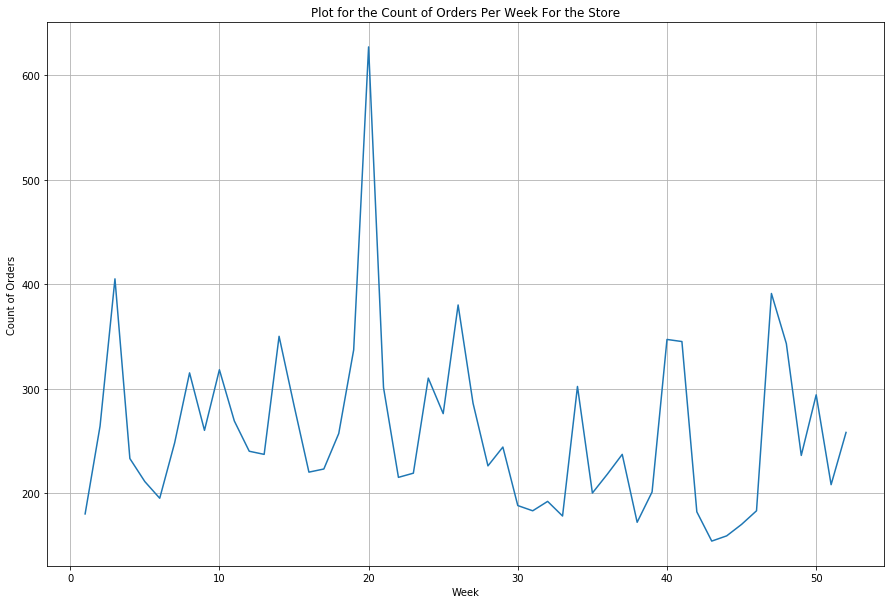

In [118]:
graph = df.groupby(df.date.dt.weekofyear)['customer_id'].count()

fig, ax = plt.subplots(figsize=(15,10))
graph.plot(ax = ax)
plt.title('Plot for the Count of Orders Per Week For the Store')
plt.xlabel('Week')
plt.ylabel('Count of Orders')
ax.grid()
plt.show()

# --------------------------------------------------------------------------------------------

## Question 3 

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

### Solution 

To determine whether there is a significant difference between the Mean of Gender 0 and Gender 1, we Use t-test compare the means of these two population. 


Null Hypothesis – H0 : µ_1= µ_2 | Alternate Hypothesis – H1 : µ_1 ≠ µ_2

Here, as far as this problem is concerned, it is preferable to do Welch’s T test, because there is high possibility that the Variance of these samples might not be equal.

So, for the Rejection Criteria for the Null Hypothesis, the |test statistic| > t (α/2,V). Since the Degree of Freedom is Really high, we choose the comparing statistic to be 1.96 (From t table).

Also, If p-value is less than 0.5, it also rejects the null hypothesis.

In [121]:
from scipy.stats import ttest_ind

# Splitting the data into two samples based on gender

gender1 = df[(df['gender'] == 1)]
gender0 = df[(df['gender'] == 0)]

results = ttest_ind(gender1.value, gender0.value, equal_var=False)
print(results)

alpha = 0.05
if ((abs(results[0]) > 1.96) & (results[1]/2 < alpha)):
    print ("Reject Null Hypothesis, mean of {} is unequal to mean of {}".format('gender1','gender0'))
else:
    print ("Accept Null Hypothesis, mean of {} is equal to mean of {}".format('gender1','gender0'))

Ttest_indResult(statistic=-1.976107933576866, pvalue=0.04816296295128402)
Reject Null Hypothesis, mean of gender1 is unequal to mean of gender0


### Inference 

On Closer examination of the result, the test statistic has a value closer to 1.96 and the p value has a vlaue very much closer to 0.5. So, the difference in mean of values between gender0 and gender1 is very very low. 

But, in a statistical point of view, with 95% Confidence, we can say that the mead order value between gender0 and gender1 is significant. 

# --------------------------------------------------------------------------------------------

## Question 4  

Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

#### Basic Confusion Matrix 

In [122]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.gender, df.predicted_gender)

array([[3349, 3410],
       [1463, 5249]])

#### Advanced Options performed using Confusion Matrix 

In [130]:
# Defining a function to plot the Confusion Matrix 

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy 0.6382599658525722

 classification report
              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

   micro avg       0.64      0.64      0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471


 confusion matrix
[[3349 3410]
 [1463 5249]]


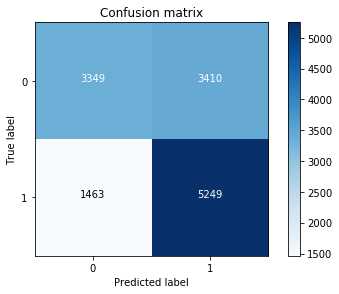


 Recall Metric in the testing dataset
0.7820321811680572

 score_auc
0.6387598396593356


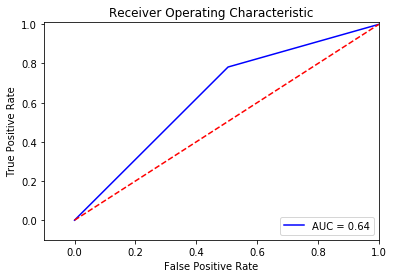

In [129]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report


# Accuracy Score and Classification Report 

print('accuracy',accuracy_score(df.gender, df.predicted_gender))
print('\n classification report')
print(classification_report(df.gender, df.predicted_gender))
print('\n confusion matrix')
print(confusion_matrix(df.gender, df.predicted_gender))

# Confusion Matrix 

cnf_matrixrf = confusion_matrix(df.gender, df.predicted_gender)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixrf, classes=class_names, title='Confusion matrix')
plt.show()

# Recall Metric

print('\n Recall Metric in the testing dataset')
print(cnf_matrixrf[1,1]/(cnf_matrixrf[1,0]+cnf_matrixrf[1,1]))

# AUC Score 

fpr,tpr,thresholds=roc_curve(df.gender, df.predicted_gender)
score_aucrf=roc_auc_score(df.gender, df.predicted_gender)
print('\n score_auc')
print(score_aucrf)

# Plot ROC

roc_aucrf = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_aucrf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Inference 

The main reference for understanding the quality of prediction is the Recall Score and the Area Under the Curve Score. Here, 

Recall = 0.78 
AUC = 0.64

Although the accuracy doesnt seem to be bad, from the ROC Curve, the Curve is well above the dotted line. So, the prediction ain't bad. 

But, I would recommend that the accuracy of the prediction could be improved by using better prediction modelling or optimizing the current model by optimizing the Parameters using GridSearchCV

# --------------------------------------------------------------------------------------------

## Question 5  

Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

One of my major interest in working with building Machine Learning Models, to make accurate predictions. The general method that is employed is, once we decide the model to fit (say Random Forest), we fit the basic model, with the automatic parameter settings and check its performance. After this, we keep changing the parameter to increase the predicitivity of the model. So, people ususally employ grid search for this. The problem with the grid search is, we need to specify the parameter range for all the parameters that we need to study and because of the the run time of the GridSearchCV increases exponentially. We need a way to curtail the range input that we give in GridSearchCV. 

That's when I was able to obtain an idea to determine the optimal range that we could give in GridSearchCV. Say, the output in binary. So the Accuracy_Score could be used to understand the model performance. So I developed this code where in a graph will be plotted for each of the parameter in the model with two curves one for the test and one for the train with y-axis being the accuracy score and x-axis being the entire range of the value of that one parameter. Sp, we are now aware of how the accuracy changes if we change that parameter. With this Knowledge, we can drastically reduce the run time of GridSearchCV with an optimized range, yet obtaining a model with very hig accuracy. We can employ this for Regression output as well, but instead of accuarcy score, we can use Root Mean Square Error (RMSE) and R Squared. 

This technique has helped me in increasing the model's performance most of the time. Specifically in the recent project that I was working on as a Data Analyst for the Decision Centre for Educational Excellence, I was responsible for building a model to predict the Grade11AZTest Pass Percentage and I was able to develop a model with 85% Accuracy which was 5% More accurate relative to the other models prepared by the other Data Analysts in the office. 

Example of the technique mentioned above - https://github.com/arvindramkumar/Data-Mining-Using-RF/blob/master/Code.ipynb (Link to one of my project in GitHub)

# --------------------------------------------------------------------------------------------